In [1]:
# MATH2070 Computer Assignment 
#Sydney Robertson

## Libraries:

SyntaxError: invalid syntax (<ipython-input-1-e285bb7fca77>, line 2)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import numpy as np
import scipy as sp
import scipy.stats as sps
import math



## Reading in the Data:

Use Pandas to read in the data and also some minor transformations to fit to the preferred format.

In [5]:
data = pd.read_excel("Country Indices.xlsx", index_col = 0, sheet_name= 1, skiprows = [1,2])

In [6]:
data.index = data.index.strftime('%d/%m/%Y')

In [7]:
data.head()

,Italy,US,Australia,UK,Brazil,Japan,Russia,China,France,Canada,Korea,Switzerland,Spain,India,Mexico,Germany,Indonesia,Netherlands,Saudi Arabia,Turkey
03/01/2000,41226.0,1455.22,3117.7,6930.2,16930.4,18934.34,175.26,NaN,5917.37,495.86,1028.07,7570.1,11610.0,5375.11,NaN,6750.76,676.919,675.44,2028.53,152.09
04/01/2000,40314.0,1399.42,3093.7,6665.9,15851.0,19002.86,175.26,NaN,5672.02,484.07,1059.04,7268.1,11206.6,5491.01,NaN,6586.95,700.218,642.25,2028.53,175.12
05/01/2000,39452.0,1402.11,3018.7,6535.9,16245.1,18542.55,179.01,NaN,5479.70,478.50,986.31,7181.3,10863.1,5357.00,NaN,6502.07,678.087,632.31,2028.53,169.32
06/01/2000,38835.0,1403.45,2999.3,6447.2,16106.9,18168.27,185.52,NaN,5450.11,476.27,960.79,7280.6,10863.1,5421.53,NaN,6474.92,688.521,624.21,2028.53,162.00
07/01/2000,40194.0,1441.47,3023.4,6504.8,16309.2,18193.41,185.52,NaN,5539.61,496.97,948.65,7448.0,11102.4,5414.48,NaN,6780.96,688.521,644.86,2028.53,158.37


### Date Selections

In [8]:
# Dates were entered to index the dataset properly and quickly.

# entire period dates:

start_date = "03/01/2007"
end_date = "31/08/2020"

# gfc dates including peak

gfc_start_date = "03/01/2007"
gfc_end_date = "31/05/2010"
gfc_peak_start_date = "02/09/2008"
gfc_peak_end_date = "01/06/2009"

# Covid dates including peak

covid_start_date = "11/03/2020"
covid_end_date = "31/08/2020"
covid_peak_start_date = "11/03/2020"
covid_peak_end_date = "29/05/2020"

# interim dates

interim_start_date = "01/06/2010"
interim_end_date = "10/03/2020"

## Question One - Covariance and Correlation 

### Part (i):

The use of the log allows for normalisation of the dataset, changing the values to a more comparable metric. For example, countries have different values of currency to each other, with the logarithmic transformation, we can compare these returns in close proximity to each other. 

### Part (ii):

The following code selects the data for the chosen dates of study:

In [9]:
entire_period = data[start_date:end_date]
entire_period.tail()

,Italy,US,Australia,UK,Brazil,Japan,Russia,China,France,Canada,Korea,Switzerland,Spain,India,Mexico,Germany,Indonesia,Netherlands,Saudi Arabia,Turkey
25/08/2020,20030.05,3443.62,6161.391,6037.01,102117.6,23296.77,1267.16,4761.95,5008.27,998.340,2366.73,10231.25,7108.4,38843.88,783.19,13061.62,5338.888,559.81,7938.36,1092.16
26/08/2020,20137.29,3478.73,6116.361,6045.60,100627.3,23290.86,1273.24,4706.13,5048.43,1009.303,2369.32,10309.65,7123.0,39073.92,773.70,13190.15,5340.328,566.23,7955.04,1099.02
27/08/2020,19847.38,3484.55,6126.231,5999.99,100623.6,23208.86,1264.86,4731.35,5015.97,1005.780,2344.45,10240.46,7090.7,39113.47,771.18,13096.36,5371.472,562.41,7934.43,1108.93
28/08/2020,19841.01,3508.01,6073.813,5963.57,102142.9,22882.65,1265.62,4844.27,5002.94,1002.275,2353.80,10164.49,7133.0,39467.31,773.98,13033.20,5346.659,556.80,7934.43,1100.55
31/08/2020,19633.69,3500.31,6060.462,5963.57,99369.2,23139.76,1258.60,4816.22,4947.22,990.515,2326.17,10135.56,6969.5,38628.29,754.46,12945.38,5238.487,549.20,7940.70,1078.61


The following code redesigns the data so that each country starts at 100 and changes accordingly:

In [10]:
# Using the iloc function for the entire dataset and then selecting all rows and columns, then dividing by
# the first row of each column and multiplying by 100, this normalizes the data.
# A copy of the data was used to preserve immutability of the subsetted dataset. 

normalised_data = entire_period.copy()
normalised_data.iloc[:,:] = (normalised_data.iloc[:,:]/normalised_data.iloc[0,:])*100

Although we initially get a warning for caveats on coding in Pandas Python, this code still works and correctly transforms the data for our question. This is shown by using the *.head()* function in the next cell to breifly look at the data in the next cell:

In [11]:
normalised_data.head()

,Italy,US,Australia,UK,Brazil,Japan,Russia,China,France,Canada,Korea,Switzerland,Spain,India,Mexico,Germany,Indonesia,Netherlands,Saudi Arabia,Turkey
03/01/2007,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
04/01/2007,99.476963,100.122829,98.857975,99.493591,99.042643,100.742141,100.000000,101.275814,99.351978,99.052767,99.144286,100.056501,100.050782,98.978160,99.737079,99.747135,99.421925,99.796549,100.000000,99.716236
05/01/2007,98.894489,99.513624,98.631701,98.434879,95.049870,99.220705,100.000000,101.559491,98.332359,98.348484,98.326179,99.775789,99.510264,98.898317,97.995678,98.531979,99.882325,98.543931,100.000000,98.256513
08/01/2007,98.728068,99.734576,97.390886,98.025004,96.365420,99.220705,100.000000,104.434482,98.354459,98.953130,97.265406,99.216158,99.632698,97.411544,98.723213,98.748677,98.838235,98.296599,97.474944,96.714983
09/01/2007,98.820788,99.683044,98.944817,98.055072,94.513481,100.069315,93.585061,107.792068,98.611814,98.091884,97.515876,99.482409,99.557568,96.799197,96.583829,98.850003,97.066129,98.906951,97.436373,94.800215


Now that the dataset has been normalised for the entire chosen period, we can now subset this dataset for our 5 individual periods. 

In [12]:
# This question requires us to create plots of each country within specific date ranges, the 
# data was then sliced into their appropriate sections and used later on.
gfc_total_normalised = normalised_data[gfc_start_date:gfc_end_date]
gfc_peak_normalised = normalised_data[gfc_peak_start_date:gfc_peak_end_date]
interim_period_normalised = normalised_data[interim_start_date:interim_end_date]
covid_total_normalised = normalised_data[covid_start_date:covid_end_date]
covid_peak_normalised = normalised_data[covid_peak_start_date:covid_peak_end_date]


Using the normalised datasets, we can plot index values for each country starting from 100 throughout the entire period. The different periods are plotted in different colours to distinguish between each other, however, each country is plotted the same. 

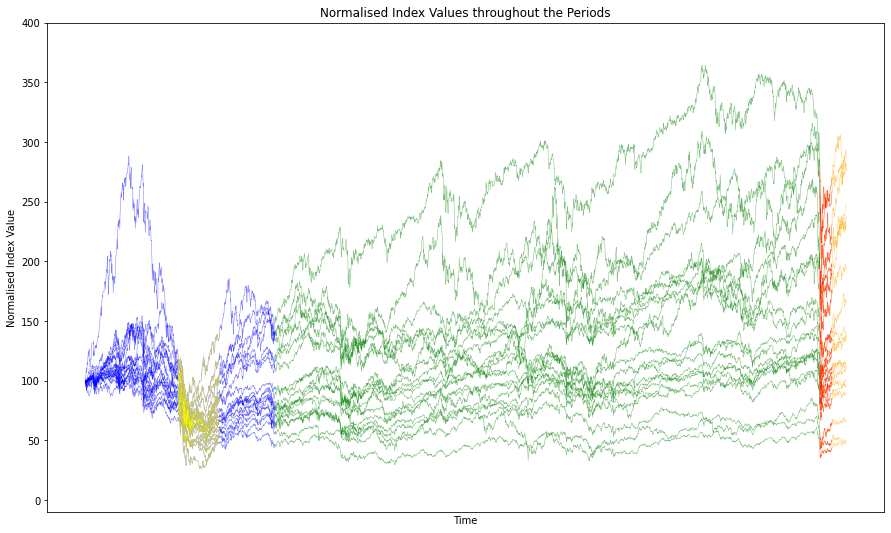

In [13]:
fig = plt.figure(figsize = (15,9))
gfc_plot = plt.plot(gfc_total_normalised.index.values, gfc_total_normalised, color = 'blue', alpha = 0.5, linewidth = 0.5)
gfc_peak_plot = plt.plot(gfc_peak_normalised.index, gfc_peak_normalised, color = 'yellow', alpha = 0.5, linewidth = 0.5)
plt.plot(interim_period_normalised.index, interim_period_normalised, color = 'green', alpha = 0.5, linewidth = 0.5)
covid_plot = plt.plot(covid_total_normalised.index, covid_total_normalised, color = 'orange', alpha = 0.5, linewidth = 0.5)
covid_peak_plot = plt.plot(covid_peak_normalised.index, covid_peak_normalised, color = 'red', alpha = 0.5, linewidth = 0.5)

plt.title("Normalised Index Values throughout the Periods")
plt.ylim(-10,400)
plt.ylabel("Normalised Index Value")
plt.xlabel("Time")
plt.xticks([])

plt.show()




### Part (iii)

The following section shows the correlation matrix plot of each period.

The returns for the periods are required, this calculation is done on the whole period first then subsetting is used for each period. 

In [14]:
shift = entire_period.shift()

In [15]:
# calculating the returns using the given equation
returns_total = np.log(entire_period) - np.log(entire_period.shift(1))
# readjusting the data so that there are no NaN values within the first row
returns_total.iloc[0,:] = np.full(20, 0)
# quick look at the data shows us the calculation was performed successfully
returns_total.head()

,Italy,US,Australia,UK,Brazil,Japan,Russia,China,France,Canada,Korea,Switzerland,Spain,India,Mexico,Germany,Indonesia,Netherlands,Saudi Arabia,Turkey
03/01/2007,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
04/01/2007,-0.005244,0.001228,-0.011486,-0.005077,-0.009620,0.007394,0.000000,0.012677,-0.006501,-0.009517,-0.008594,0.000565,0.000508,-0.010271,-0.002633,-0.002532,-0.005798,-0.002037,0.000000,-0.002842
05/01/2007,-0.005873,-0.006103,-0.002292,-0.010698,-0.041149,-0.015217,0.000000,0.002797,-0.010316,-0.007136,-0.008286,-0.002809,-0.005417,-0.000807,-0.017614,-0.012257,0.004620,-0.012631,0.000000,-0.014747
08/01/2007,-0.001684,0.002218,-0.012660,-0.004173,0.013746,0.000000,0.000000,0.027915,0.000225,0.006129,-0.010847,-0.005625,0.001230,-0.015147,0.007397,0.002197,-0.010508,-0.002513,-0.025575,-0.015813
09/01/2007,0.000939,-0.000517,0.015830,0.000307,-0.019405,0.008516,-0.066299,0.031644,0.002613,-0.008742,0.002572,0.002680,-0.000754,-0.006306,-0.021909,0.001026,-0.018092,0.006190,-0.000396,-0.019997


Subsetting for each period occurs within the next cell:

In [16]:
gfc_returns = returns_total.loc[gfc_start_date:gfc_end_date]
gfc_returns.drop(gfc_returns.index[0], inplace = True)
gfc_peak_returns = returns_total.loc[gfc_peak_start_date:gfc_peak_end_date]
interim_returns = returns_total.loc[interim_start_date:interim_end_date]
covid_returns = returns_total.loc[covid_start_date:covid_end_date]
covid_peak_returns = returns_total.loc[covid_peak_start_date:covid_peak_end_date]

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [17]:
interim_returns.head()

,Italy,US,Australia,UK,Brazil,Japan,Russia,China,France,Canada,Korea,Switzerland,Spain,India,Mexico,Germany,Indonesia,Netherlands,Saudi Arabia,Turkey
01/06/2010,-0.013641,-0.017314,-0.003745,-0.004855,-0.019306,-0.005839,-0.007772,-0.010549,-0.001278,-0.016664,-0.006633,0.000633,-0.006399,-0.022235,-0.027439,0.002836,-0.026205,0.001589,-0.025567,0.001378
02/06/2010,-0.004995,0.025514,-0.007296,-0.002323,0.017661,-0.011244,0.007252,0.004860,-0.000451,0.018759,0.000000,0.008232,-0.003415,0.010195,0.008319,-0.000012,0.003321,0.004194,0.005909,0.013732
03/06/2010,0.015016,0.004043,0.023668,0.011553,0.000000,0.031867,0.006662,-0.007809,0.015822,0.003184,0.019100,0.007822,0.000884,0.016615,-0.004045,0.012202,0.027884,0.013763,0.000000,0.003508
04/06/2010,-0.038668,-0.035017,-0.008193,-0.016481,-0.020336,-0.001312,-0.023517,0.003033,-0.029014,-0.022074,0.001377,-0.018848,-0.038775,0.005586,-0.012217,-0.019303,0.004357,-0.017926,0.000000,-0.014434
07/06/2010,-0.005542,-0.013624,-0.028142,-0.011170,-0.008024,-0.039176,-0.014747,-0.017893,-0.012196,-0.005692,-0.015845,-0.001260,-0.014460,-0.019861,-0.011832,-0.005730,-0.026203,-0.011522,-0.002202,-0.005619


As each period has been subsetted from the total returns, correlation matrices can be calculated and visualised. The method used within this subsection involves creating a function that is given a dataset and description (as a string). The function takes the chosen dataset and description, this is to be entered as the chosen period, for example "GFC," and it then plots the correlation matrix of the chosen period as a heatmap. The function also provides a colour bar with an appropriate scale for readers to interpret the heatmap properly; orange repreresents higher correlation, whereas blue represents lower correlation. 

For the GFC period, the correlation matrix is visualised as:

In [18]:
def corr_matrix(dataset):
  return dataset.corr()

In [19]:
gfc_corr_matrix = corr_matrix(gfc_returns)
gfc_peak_corr_matrix = corr_matrix(gfc_peak_returns)
interim_corr_matrix = corr_matrix(interim_returns)
covid_corr_matrix = corr_matrix(covid_returns)
covid_peak_corr_matrix = corr_matrix(covid_peak_returns)

In [20]:
# This function requires the user to enter a dataset as the first argument and the period name as a string as the second argument
def corr_vis(dataset, description):
  fig = plt.figure(figsize = (10,10))
  ax = fig.add_subplot()
  cax = ax.matshow(dataset, interpolation = "nearest")
  fig.colorbar(cax)
  plt.title("Correlation Matrix Visualisation of the " + description + " Period", pad = 100)
  plt.xticks(range(len(dataset.columns)), dataset.columns, rotation = 90)
  plt.yticks(range(len(dataset.columns)), dataset.columns)
  plt.show()

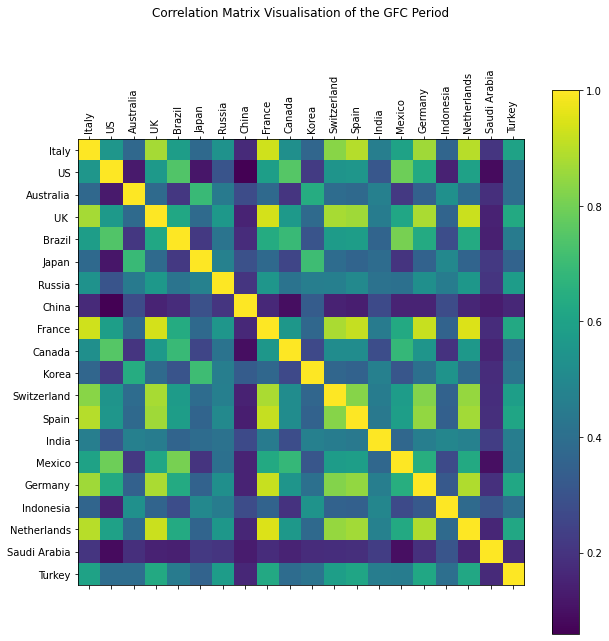

In [21]:
ax1 = corr_vis(gfc_corr_matrix, "GFC")

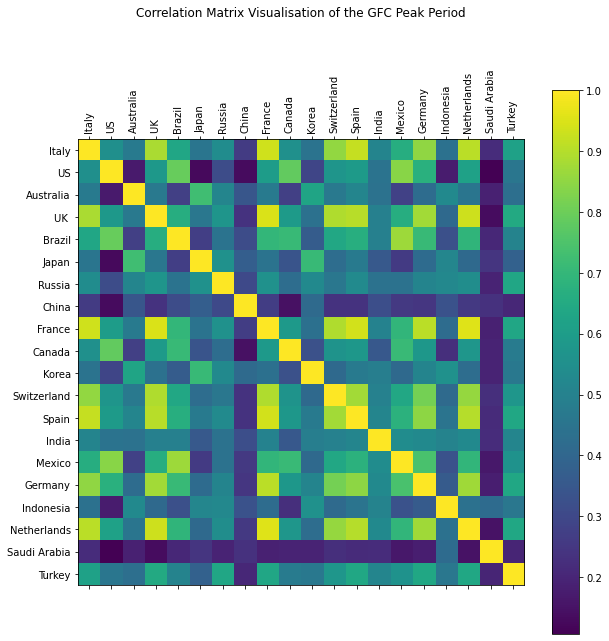

In [22]:
ax2 = corr_vis(gfc_peak_corr_matrix, "GFC Peak")


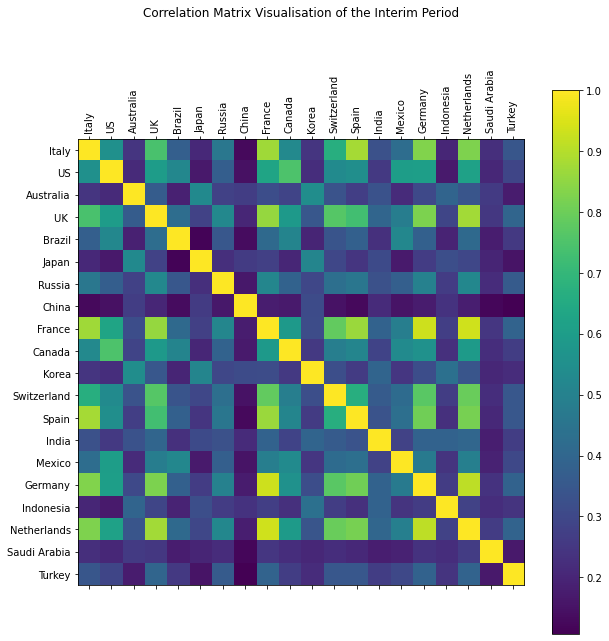

In [23]:
ax3 = corr_vis(interim_corr_matrix, "Interim")

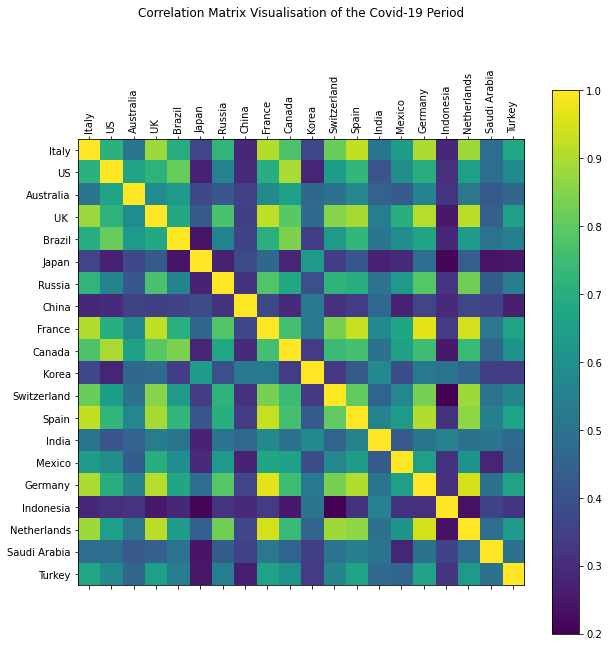

In [24]:
ax4 = corr_vis(covid_corr_matrix, "Covid-19")

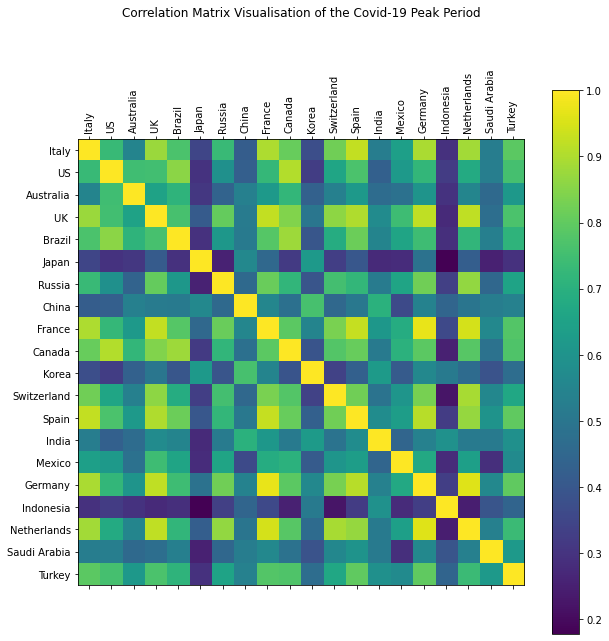

In [25]:
ax5 = corr_vis(covid_peak_corr_matrix, "Covid-19 Peak")

### Part (iv)



In [26]:
def corr_histogram(corr_matrix, description, colour):
  flatten_dataset = np.array(corr_matrix).flatten()
  plt.hist(flatten_dataset, bins = 20, color = colour, edgecolor = 'black', linewidth = 1)
  plt.xlabel("Correlation Coefficient")
  plt.ylabel("Frequency")
  plt.xlim(0,1.1)
  plt.title("Histogram of Correlation Coefficients of the " + description + " Period")
  plt.grid(True, axis = "y", zorder = 0.5)
  plt.show()


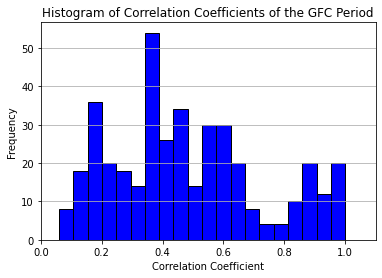

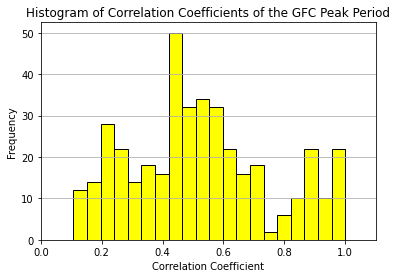

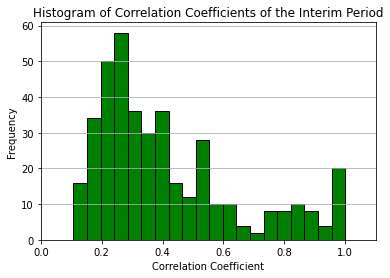

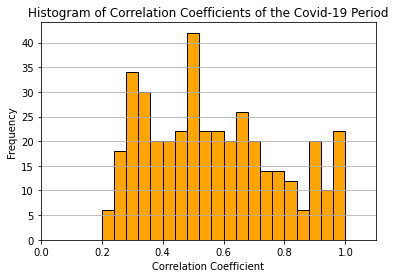

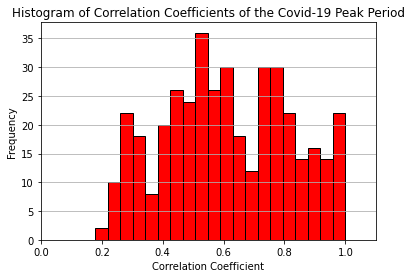

In [27]:
gfc_hist = corr_histogram(gfc_corr_matrix, "GFC", "blue")
gfc_peak_hist = corr_histogram(gfc_peak_corr_matrix, "GFC Peak", "yellow")
interim_hist = corr_histogram(interim_corr_matrix, "Interim", "green")
covid_hist = corr_histogram(covid_corr_matrix, "Covid-19", "orange")
covid_peak_hist = corr_histogram(covid_peak_corr_matrix, "Covid-19 Peak", "red")


In [28]:
def mean_correlation(corr_matrix, description):
  print("Average of the " + description + " Period: " + str(np.mean(np.mean(corr_matrix))) + "\n") 


mean_correlation(gfc_corr_matrix, "GFC")
mean_correlation(gfc_peak_corr_matrix, "GFC Peak")
mean_correlation(interim_corr_matrix, "Interim")
mean_correlation(covid_corr_matrix, "Covid-19")
mean_correlation(covid_peak_corr_matrix, "Covid-19 Peak")

Average of the GFC Period: 0.48140447377118034

Average of the GFC Peak Period: 0.5250665995279082

Average of the Interim Period: 0.4127883426571105

Average of the Covid-19 Period: 0.5687747005286283

Average of the Covid-19 Peak Period: 0.6138860881484545



## **Question Two**

### Part (i)

In [29]:
t = 0.2
budget = 1e6

# Calculate the return vector using the mean
r = interim_returns.mean()
r_transpose = np.transpose(r)

S = interim_returns.cov()
S_inverse = np.linalg.inv(S)

e = np.full(S.shape[0],1)
e_transpose = np.transpose(e)

s_inv_times_e = np.matmul(S_inverse, e)
s_inv_times_r = np.matmul(S_inverse, r)

a = np.dot(np.dot(e_transpose, S_inverse), e)
b = np.dot(np.dot(r_transpose, S_inverse), e)
c = np.dot(np.dot(r_transpose, S_inverse), r)
d = a*c-b**2

alpha = np.matmul(S_inverse, e)/a
beta = np.matmul(S_inverse, (r-(b/a) * e))

country_proportions = (alpha + t*beta)
sum_country_prop = sum(country_proportions)

mu = (b + d*t)/a
sigma = np.sqrt((1 + d*t**2)/a) 

expected_return = mu*budget
risk = sigma

print("Portfolio for the Interim Period\n")

print("Country Weights: \n")
for country in range(len(interim_returns.columns)):
  print(interim_returns.columns[country] + ": " + str(country_proportions[country]))
  
print("\n")

print("Sum of country proportions: " + str(sum_country_prop) + "\n")
print("Expected Return of Porfolio: " + str(np.round(expected_return, 2)) + "\n")
print("Risk of Portfolio " + str(sigma) + "\n")

Portfolio for the Interim Period

Country Weights: 

Italy: -0.22820997847370558
US: 1.892940295354328
Australia: 0.1264355505722782
UK : -0.9723442942250736
Brazil: 0.026650346163480672
Japan: 0.3112735182418229
Russia: -0.26003506427286127
China: 0.028842689769424924
France: -0.5686989971993918
Canada: -0.8885973578616542
Korea: -0.4916089635997479
Switzerland: 0.04845242621729001
Spain: -0.814886534701883
India: 0.6340744530139719
Mexico: -0.3893478778006053
Germany: 0.9579808881468145
Indonesia: 0.4348483457513688
Netherlands: 1.0606494014456658
Saudi Arabia: -0.11695636951979224
Turkey: 0.2085375229782701


Sum of country proportions: 1.000000000000001

Expected Return of Porfolio: 1384.32

Risk of Portfolio 0.016624393035923102



In [30]:
n_assets = 20
n_portfolio = 1000
count = 0

random_weights = []
random_sigmas = []
random_mus = []

while count < n_portfolio:
  weights = np.random.uniform(-1*n_assets, n_assets, size = n_assets)
  weights = weights/np.sum(weights)
  
  portfolio_sigma = np.sqrt(np.dot(np.dot(np.transpose(weights), S), weights))

  if portfolio_sigma > 0.1:
    weights = np.random.uniform(-1*n_assets, n_assets, size = n_assets)
    weights = weights/np.sum(weights)

    portfolio_sigma = np.sqrt(np.dot(np.dot(np.transpose(weights), S), weights))

  else:
    portfolio_mu = np.dot(np.transpose(weights), r)

    random_mus.append(portfolio_mu)
    random_weights.append(weights)
    random_sigmas.append(portfolio_sigma)

    count += 1

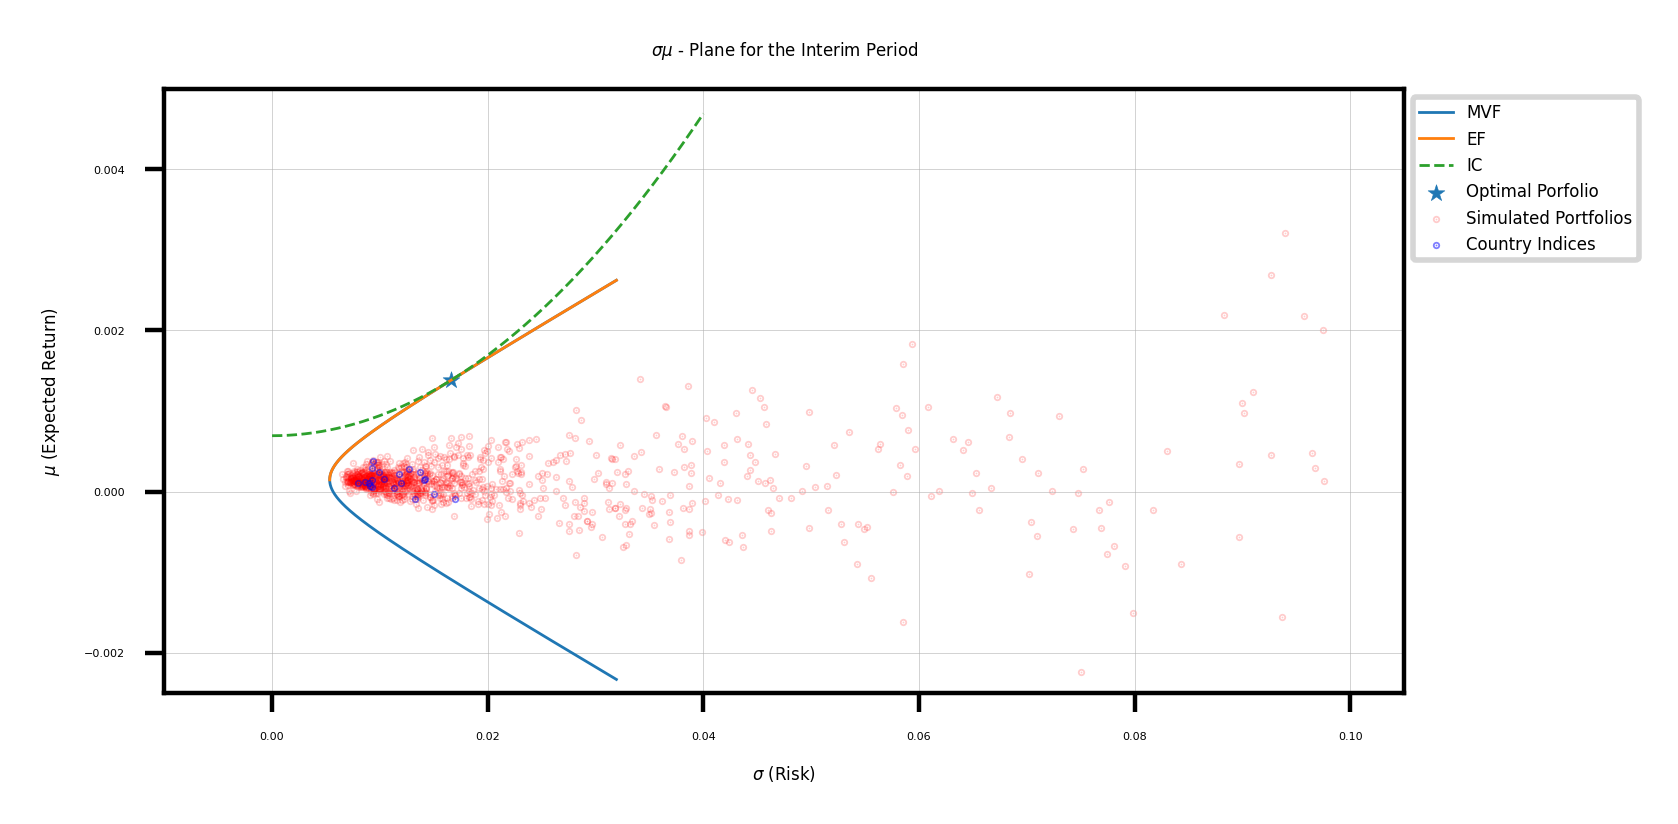

In [31]:
mu_indices = r 
sigma_indices = np.sqrt(interim_returns.var())

t_MVF = np.linspace(-0.4, 0.4, 1000)
mu_MVF = (b+d*t_MVF)/a
sigma_MVF = np.sqrt((1 + d*t_MVF**2)/a)

t_EF = np.linspace(0,0.4, 1000)
mu_EF = (b+d*t_EF)/a
sigma_EF = np.sqrt((1 + d*t_EF**2)/a)

t = 0.2
Z = -t*mu + 0.5*sigma**2
sigma_IC = np.linspace(0,0.04, 1000)
mu_IC = (-Z + 0.5*sigma_IC**2)/t 


plt.figure(figsize = [4,2], dpi = 400)
plt.plot(sigma_MVF, mu_MVF, label = "MVF", linewidth = 0.5)
plt.plot(sigma_EF, mu_EF, label = "EF", linewidth = 0.5)
plt.plot(sigma_IC, mu_IC, label = "IC", linestyle = 'dashed', linewidth = 0.5)
plt.scatter(sigma, mu, marker = '*', linewidth = 0.1, s = 10, label = "Optimal Porfolio")
plt.scatter(random_sigmas, random_mus, color = 'red', marker = 'o', s = 0.1, alpha = 0.2, label = "Simulated Portfolios")
plt.scatter(sigma_indices, mu_indices, color = 'blue', alpha = 0.5, s = 0.1, label = "Country Indices")

plt.title("$\sigma$$\mu$ - Plane for the Interim Period", fontsize = 3)
plt.xlabel("$\sigma$ (Risk)", fontsize = 3)
plt.ylabel("$\mu$ (Expected Return)", fontsize = 3)
plt.xlim(-0.01, 0.105)
plt.ylim(-0.0025 , 0.005)
plt.xticks(fontsize = 2)
plt.yticks(fontsize = 2)
plt.grid(linewidth = 0.1)
plt.legend(bbox_to_anchor=(1, 1), fontsize = 3)
plt.show()
#plt.savefig("Question 2 Part (ii).pdf")

## **Question Three**

### **Part (i)**

In [32]:
risk_aversion_parameter = np.linspace(0, 50, 100)
variable_t_countries = []
country_counts = np.zeros(len(interim_returns.columns))
for t in risk_aversion_parameter:
  country_weights = alpha + t*beta
  variable_t_countries.append(country_weights)
  for i in range(len(country_weights)):
    if country_weights[i] < 0:
      country_counts[i] += 1
  
variable_t_countries_trans = np.transpose(variable_t_countries)

x_min_tick = min(risk_aversion_parameter)
x_max_tick = max(risk_aversion_parameter)
x_num_ticks = int((x_max_tick/x_max_tick)*10 + 1)

y_min_tick = math.floor((min([min(list) for list in variable_t_countries]))/100)*100
y_max_tick = math.ceil((max([max(list) for list in variable_t_countries]))/100)*100
y_num_ticks = int(((y_max_tick - y_min_tick)/(y_max_tick - y_min_tick))*(y_max_tick-y_min_tick)/100 + 1)
print(y_min_tick, y_max_tick, y_num_ticks)

-300 500 9


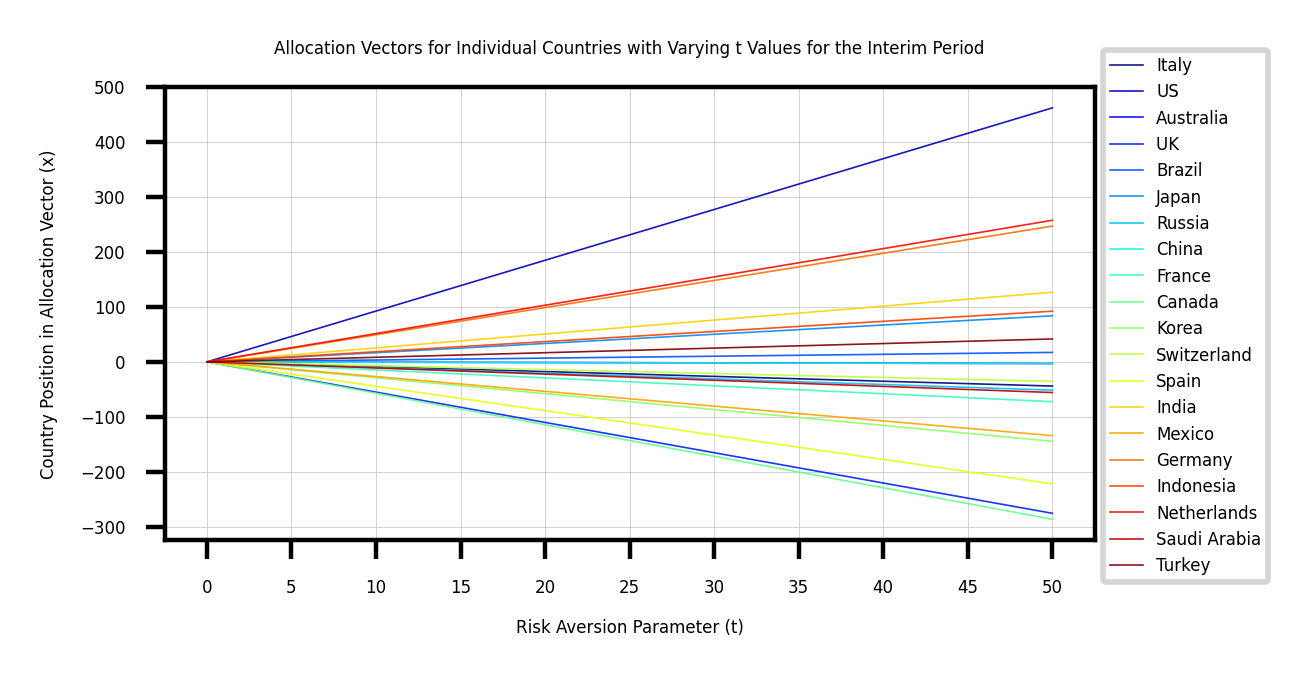

In [33]:
plt.figure(figsize = [3,1.5], dpi = 400)
num_colours = len(variable_t_countries_trans)
colormap = plt.cm.gist_ncar
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, num_colours))))
for country in range(len(variable_t_countries_trans)):
  #print(interim_returns.columns[country] + ": " + str(len(variable_t_countries_trans[country])))
  plt.plot(risk_aversion_parameter, variable_t_countries_trans[country], linewidth = 0.3, alpha = 0.9, label = interim_returns.columns[country])

#plt.ylim(-0.3, 0.3)

plt.xlabel("Risk Aversion Parameter (t)", fontsize = 3)
plt.ylabel("Country Position in Allocation Vector (x)", fontsize = 3)
plt.title("Allocation Vectors for Individual Countries with Varying t Values for the Interim Period", fontsize = 3)
plt.xticks(np.linspace(x_min_tick, x_max_tick, x_num_ticks), fontsize = 3)
plt.yticks(np.linspace(y_min_tick, y_max_tick, y_num_ticks), fontsize = 3)
plt.legend(bbox_to_anchor=(1, 1.1), fontsize = 3)
plt.grid(linewidth = 0.1)

In [34]:
short_sold = []
never_short_sell = []
print("Countries that were always short sold during the Interim Period: \n")
for i in range(len(interim_returns.columns)):
  #print(interim_returns.columns[i] + ": " + str(country_counts[i]))
  if country_counts[i] == len(risk_aversion_parameter):
    short_sold.append(interim_returns.columns[i] + ": " + str(country_counts[i]))
    print(interim_returns.columns[i])

print("\nCountries that were never short sold during the Interim Period: \n")
for i in range(len(interim_returns.columns)):
  if country_counts[i] == 0:
    print(interim_returns.columns[i])


Countries that were always short sold during the Interim Period: 

Italy
Russia
France

Countries that were never short sold during the Interim Period: 

US
India
Indonesia
Netherlands
Turkey


### **Part (ii)**

In [35]:
r_covid = covid_returns.mean()
r_transpose_covid = np.transpose(r_covid)

S_covid = covid_returns.cov()
S_inverse_covid = np.linalg.inv(S_covid)

e_covid = np.full(S.shape[0],1)
e_transpose_covid = np.transpose(e_covid)

s_inv_times_e_covid = np.matmul(S_inverse_covid, e_covid)
s_inv_times_r_covid = np.matmul(S_inverse_covid, r_covid)

a_covid = np.matmul(np.matmul(e_transpose_covid, S_inverse_covid), e_covid)
b_covid = np.matmul(np.matmul(r_transpose_covid, S_inverse_covid), e_covid)
c_covid = np.matmul(np.matmul(r_transpose_covid, S_inverse_covid), r_covid)
d_covid = a*c-b**2

alpha_covid = np.matmul(S_inverse_covid, e_covid)/a_covid
beta_covid = np.matmul(S_inverse_covid, (r-(b_covid/a_covid) * e_covid))

In [36]:
risk_aversion_parameter_covid = np.linspace(0,50, 100)
variable_t_countries_covid = []
country_counts_covid = np.zeros(len(covid_returns.columns))
for t in risk_aversion_parameter_covid:
  country_weights_covid = alpha_covid + t*beta_covid
  variable_t_countries_covid.append(country_weights_covid)
  for i in range(len(country_weights_covid)):
    if country_weights_covid[i] < 0:
      country_counts_covid[i] += 1
  
variable_t_countries_trans_covid = np.transpose(variable_t_countries_covid)

x_min_tick = min(risk_aversion_parameter_covid)
x_max_tick = max(risk_aversion_parameter_covid)
x_num_ticks = int((x_max_tick/x_max_tick)*10 + 1)

y_min_tick = math.floor((min([min(list) for list in variable_t_countries_covid]))/100)*100
y_max_tick = math.ceil((max([max(list) for list in variable_t_countries_covid]))/100)*100
y_num_ticks = int(((y_max_tick - y_min_tick)/(y_max_tick - y_min_tick))*10 + 1)
print(y_min_tick, y_max_tick, y_num_ticks)

-200 300 11


In [37]:
print(y_max_tick-y_min_tick)

500


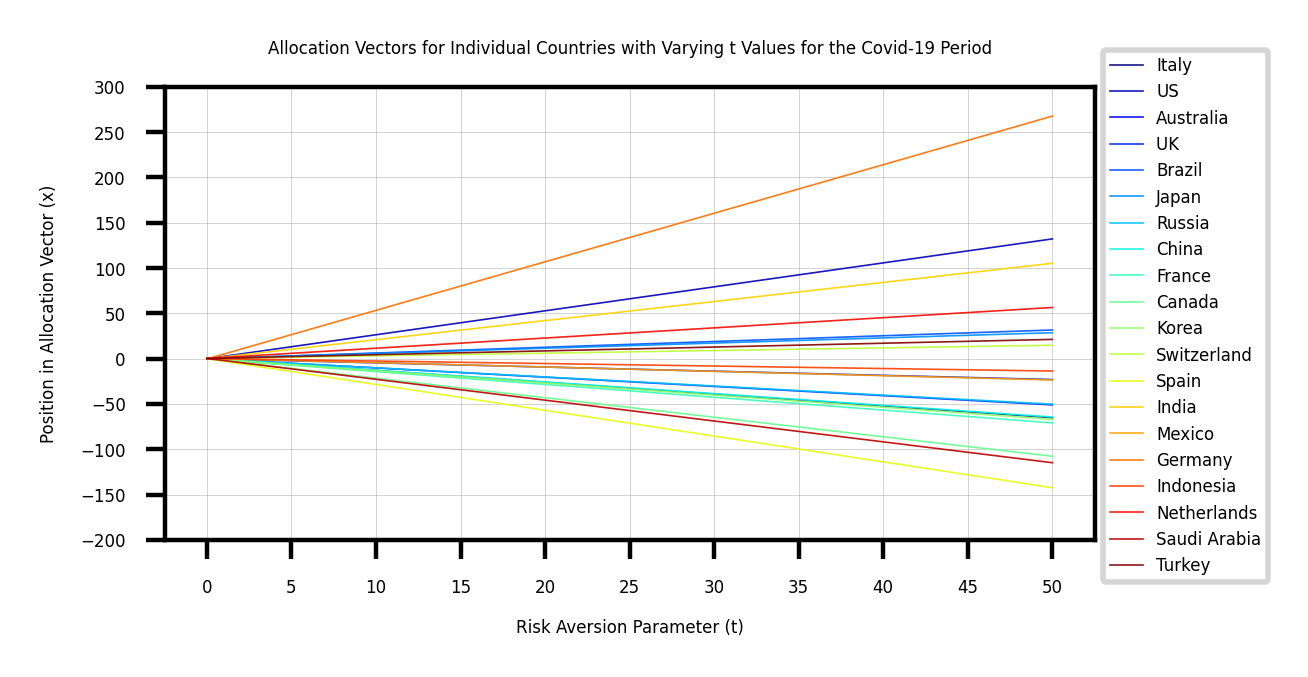

In [38]:
plt.figure(figsize = [3,1.5], dpi = 400)
num_colours = len(variable_t_countries_trans_covid)
colormap = plt.cm.gist_ncar
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, num_colours))))
for country in range(len(variable_t_countries_trans_covid)):
  #print(interim_returns.columns[country] + ": " + str(len(variable_t_countries_trans[country])))
  plt.plot(risk_aversion_parameter_covid, variable_t_countries_trans_covid[country], linewidth = 0.3, alpha = 0.9, label = covid_returns.columns[country])

#plt.ylim(-0.3, 0.3)

plt.xlabel("Risk Aversion Parameter (t)", fontsize = 3)
plt.ylabel("Position in Allocation Vector (x)", fontsize = 3)
plt.title("Allocation Vectors for Individual Countries with Varying t Values for the Covid-19 Period", fontsize = 3)
plt.xticks(np.linspace(x_min_tick, x_max_tick, x_num_ticks), fontsize = 3)
plt.yticks(np.linspace(y_min_tick, y_max_tick, y_num_ticks), fontsize = 3)
plt.legend(bbox_to_anchor=(1, 1.1), fontsize = 3)
plt.grid(linewidth = 0.1)

In [39]:
short_sold_covid = []
never_short_sold_covid = []
print("Countries that were always short sold during the Covid-19 Period: \n")
for i in range(len(covid_returns.columns)):
  #print(covid_returns.columns[i] + ": " + str(country_counts_covid[i]))
  if country_counts_covid[i] == len(risk_aversion_parameter_covid):
    short_sold_covid.append(covid_returns.columns[i] + ": " + str(country_counts_covid[i]))
    print(covid_returns.columns[i])

print("\nCountries that were never short sold during the Covid-19 Period: \n")
for i in range(len(covid_returns.columns)):
  if country_counts_covid[i] == 0:
    print(covid_returns.columns[i])

Countries that were always short sold during the Covid-19 Period: 

Italy
UK 
Russia
France
Korea
Spain

Countries that were never short sold during the Covid-19 Period: 

Japan
Switzerland
Netherlands
Turkey


## **Question Four**


### **Part (i)**

In [40]:
r_0 = 0.0025/250
x_0 = 1 - np.dot(np.transpose(country_proportions), e)
r_bar = r - r_0*e
r_sum = x_0 + np.dot(np.transpose(country_proportions), e)
allocation = 0.2*(np.dot(S_inverse, r_bar))
riskless_asset_allocation = 1 - np.sum(allocation)

In [41]:
print("\nRiskless: " + str(riskless_asset_allocation))
for country in range(len(interim_returns.columns)):
  print(interim_returns.columns[country] + ": " + str(allocation[country]))

print("\nSum of Allocation Vector: " + str(np.sum(allocation) + riskless_asset_allocation))


Riskless: 0.05278541509929602
Italy: -0.22542917981805705
US: 1.8905219173695729
Australia: 0.11910714971599781
UK : -0.9791728643190512
Brazil: 0.028889202267438296
Japan: 0.31253699648811395
Russia: -0.25714451205982874
China: 0.026654398191957043
France: -0.5538854914336089
Canada: -0.9021812626761943
Korea: -0.4961621028806944
Switzerland: 0.038372530987359536
Spain: -0.818720745207312
India: 0.6273197518346424
Mexico: -0.39715733896320843
Germany: 0.9595506969400299
Indonesia: 0.43133965582611933
Netherlands: 1.0590172705837346
Saudi Arabia: -0.12256803460969086
Turkey: 0.20632654666338388

Sum of Allocation Vector: 1.0


In [42]:
mu_hat = r_0 + 0.2*(np.dot(np.dot(np.transpose(r_bar), S_inverse), r_bar))
sigma_hat = np.sqrt(0.2**2*(np.dot(np.dot(np.transpose(r_bar), S_inverse), r_bar)))
print(sigma_hat, mu_hat)

0.016535883618520104 0.0013771772352262075


In [43]:
t = 0.2
c_bar = np.dot(np.dot(np.transpose(r_bar), S_inverse), r_bar)
mu_hat_2 = r_0 + c_bar*t
sigma_hat_2 = np.sqrt((mu_hat_2 - r_0)*t)
print(sigma_hat_2, mu_hat_2)
print(c_bar)

0.016535883618520104 0.0013771772352262075
0.006835886176131037


In [44]:
sigma_0 = np.sqrt((a*r_0**2 - 2*b*r_0 + c)/d)
sigma_0_2 = np.sqrt(c_bar/d)
print(sigma_0)
print(sigma_0_2)


0.005613103200686545
0.005613103200686545


### **Part (ii)**

In [45]:
# Tangency Portfolio

mu_m = (c-b*r_0)/(b-a*r_0)
sigma_m = (sigma_0*np.sqrt(d))/(b-a*r_0)

#print(sigma_m, mu_m)
print("Tangency Portfolio Risk: " + str(sigma_m))
print("Tangency Portfolio Return: " + str(mu_m))

Tangency Portfolio Risk: 0.017457378594158333
Tangency Portfolio Return: 0.0014533659035872316


### Part (iii)

In [46]:
gdp_values = np.array([2.001, 21.374, 1.393, 2.827, 1.84, 5.082, 1.7, 14.343, 2.716, 1.736, 1.642, 0.703082, 1.394, 2.875, 1.258, 3.846, 1.119, 0.90907, 0.792967, 0.754412])
#print(gdp_values)
gdp_weights = gdp_values/np.sum(gdp_values)


In [52]:
market_mu = np.dot(np.transpose(gdp_weights), r)
market_sigma = np.sqrt(np.dot(np.dot(np.transpose(gdp_weights), S), gdp_weights))
#print(market_sigma, market_mu)
print("Market Portfolio Risk: " + str(market_sigma))
print("Market Portfolio Return: " + str(market_mu))

Market Portfolio Risk: 0.007324688369539273
Market Portfolio Return: 0.00021506980265191498


## **Question Five**

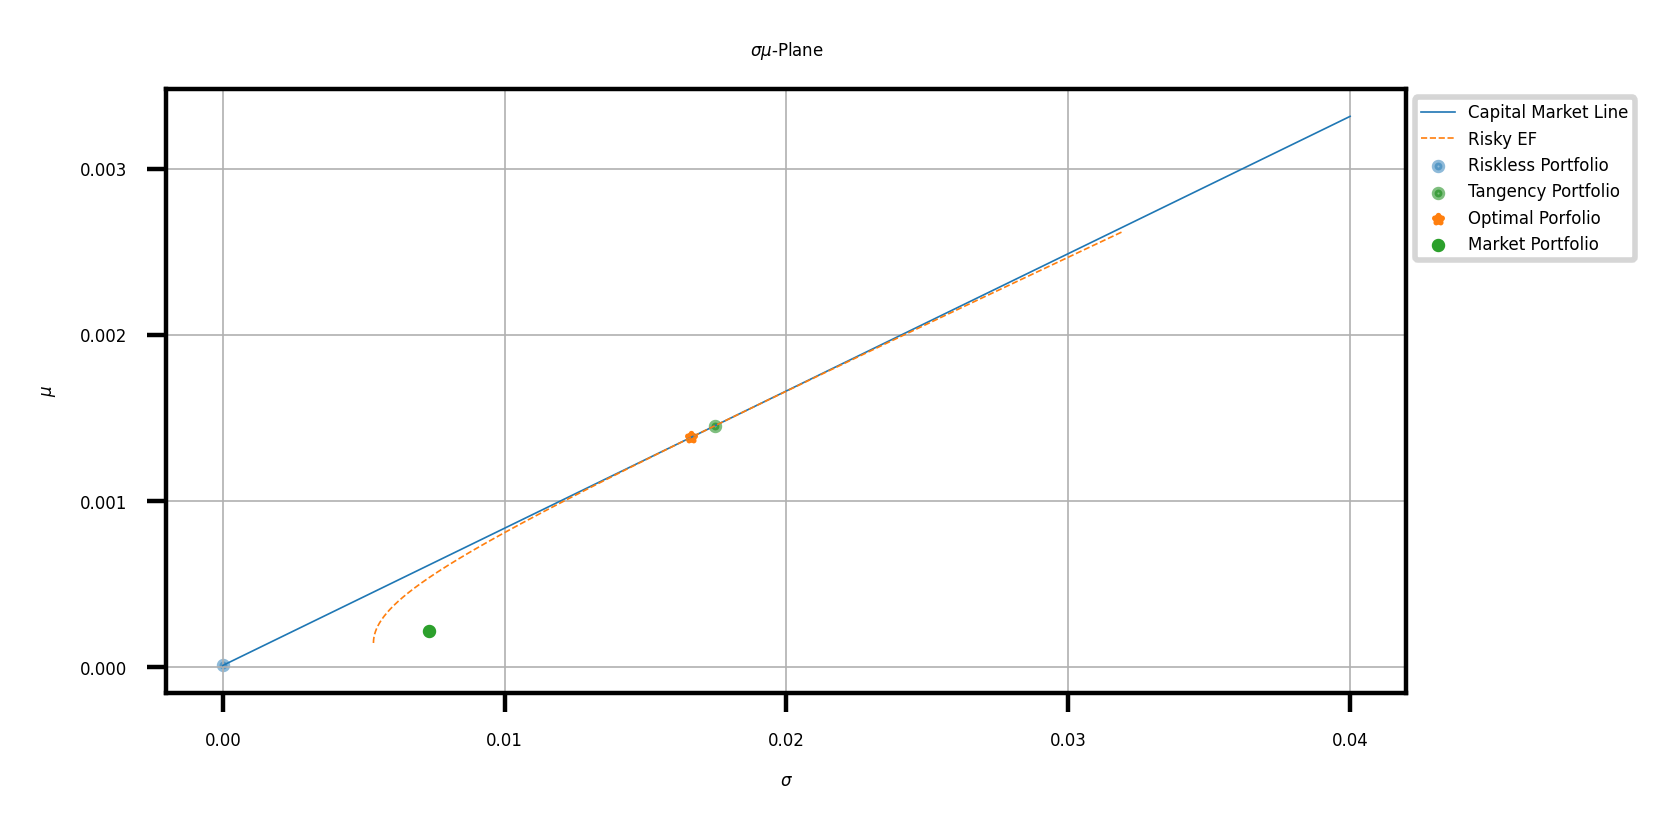

In [48]:
plt.figure(figsize = [4,2], dpi = 400)
sigma_vals = np.linspace(0,0.04,100)
mu_vals = sigma_vals * sigma_0 * np.sqrt(d) + r_0
plt.plot(sigma_vals, mu_vals, linewidth = 0.3, label = "Capital Market Line")
plt.plot(sigma_EF, mu_EF, linewidth = 0.3, linestyle = "dashed", label = 'Risky EF')
plt.scatter(0, r_0, s = 2, alpha = 0.5, label = "Riskless Portfolio")
plt.scatter(sigma_m, mu_m, color = "green", s = 2, alpha = 0.5, label = "Tangency Portfolio")
plt.scatter(sigma, mu, marker = '*', s = 2, label = "Optimal Porfolio")
plt.scatter(market_sigma, market_mu, s = 2, label = "Market Portfolio")

plt.title("$\sigma$$\mu$-Plane", fontsize = 3)
plt.xlabel("$\sigma$", fontsize = 3)
plt.ylabel("$\mu$", fontsize = 3)
plt.xticks(fontsize = 3)
plt.yticks(fontsize = 3)
plt.grid(linewidth = 0.3)
plt.legend(bbox_to_anchor=(1, 1),fontsize = 3)
#plt.xlim(-0.001,0.045)
#plt.ylim(-10, 10)
plt.show()

## **Question Six**

In [49]:
optimal_covariance_matrix = np.dot(np.dot(np.transpose(country_proportions), S), gdp_weights)
optimal_beta = optimal_covariance_matrix/(market_sigma**2)
riskless_covariance_matrix = np.dot(np.dot(np.transpose(r_bar), S), gdp_weights)
riskless_beta = riskless_covariance_matrix/(market_sigma**2)
print(riskless_beta)

0.0020025489039179065


In [50]:
betas = np.linspace(-7.5,10, 100)
mu_beta_array = betas*(market_mu - r_0) + r_0

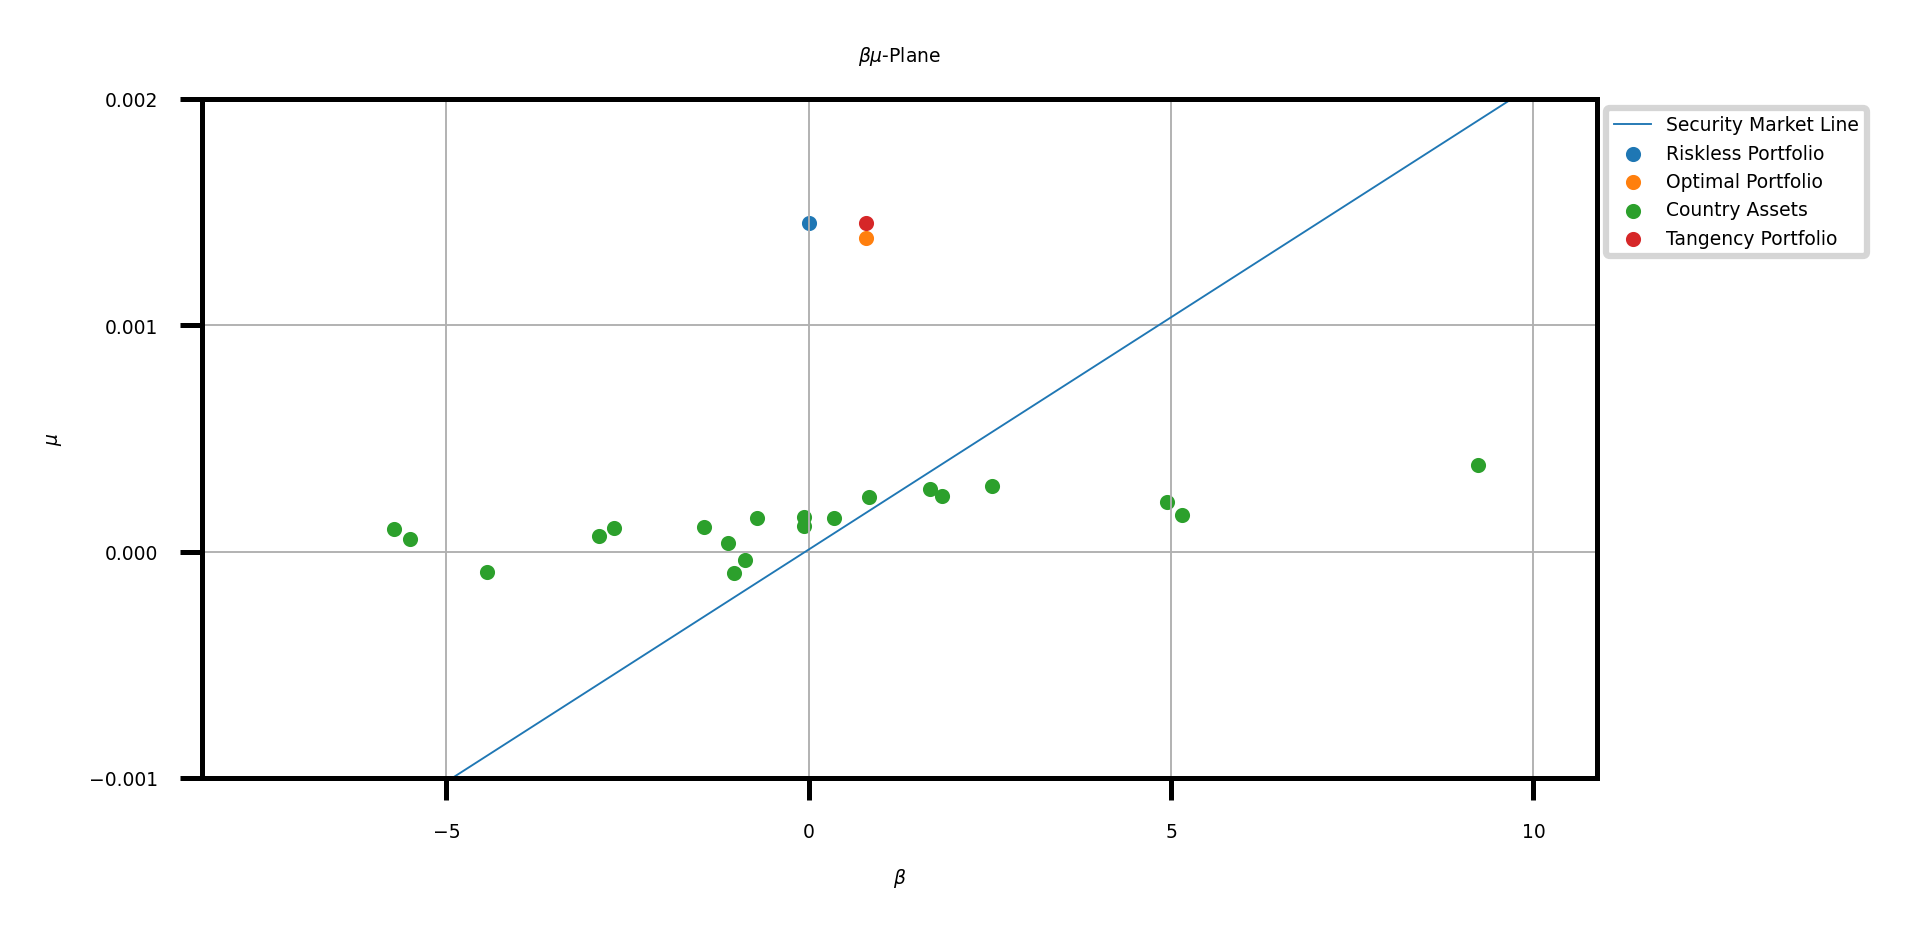

In [54]:
plt.figure(figsize = [4,2], dpi = 450)
plt.plot(betas, mu_beta_array, linewidth = 0.3, label = "Security Market Line")
plt.scatter(riskless_beta, mu_m, s = 2, label = "Riskless Portfolio")
plt.scatter(optimal_beta, mu, s = 2, label = "Optimal Portfolio")
plt.scatter(beta, mu_indices, s = 2, label = "Country Assets")
plt.scatter(optimal_beta, mu_m, s = 2, label = "Tangency Portfolio")


plt.ylim(-0.001, 0.002)
plt.title(r"$\beta \mu$-Plane", fontsize = 3)
plt.xlabel(r"$\beta $", fontsize = 3)
plt.ylabel("$\mu$", fontsize = 3)
plt.xticks(fontsize = 3)
plt.yticks(fontsize = 3)
plt.grid(linewidth = 0.3)
plt.legend(bbox_to_anchor=(1, 1),fontsize = 3)
plt.show()